## Title: M3 Linear Programming Assignment

## Author: Leo Genders

## Date: 21 July 2024

## 1) Model Formulation - Lifeguard Scheduling

**Sets** \
$D$: set of days \{0=Monday, 1=Tuesday, ..., 6=Sunday\}

**Parameters** \
$r$: vector minimum number of employees required each day ($r_0$ = 7, $r_1$ = 5, ...) \
$A$: workday adjacency matrix \
Additional consideration: All employees are scheduled for 4-day work weeks

**Decision Variable** \
$x_i$: number of employees that begin their 4-day work week on day $i$

**Objective Function and Constraints** \
Goal: Minimize the number of employees that are working throughout the week \
The optimization model is formulated as \

\begin{equation*}
\begin{matrix}
\underset{x}{\min} & \underset{j \in D}{\sum} x_j &\\
\textrm{s.t.} & \underset{j \in D}{\sum}a_{i,j}x_j & \geq & r_i & \forall i \in D \\
& x_j & \geq & 0 & \forall j \in D \\
\end{matrix}
\end{equation*}

sum of ai,j xj is number of employees working on day i \
r_i (number of employees required on day i)

## Screenshot of Excel Model - Lifeguard Scheduling

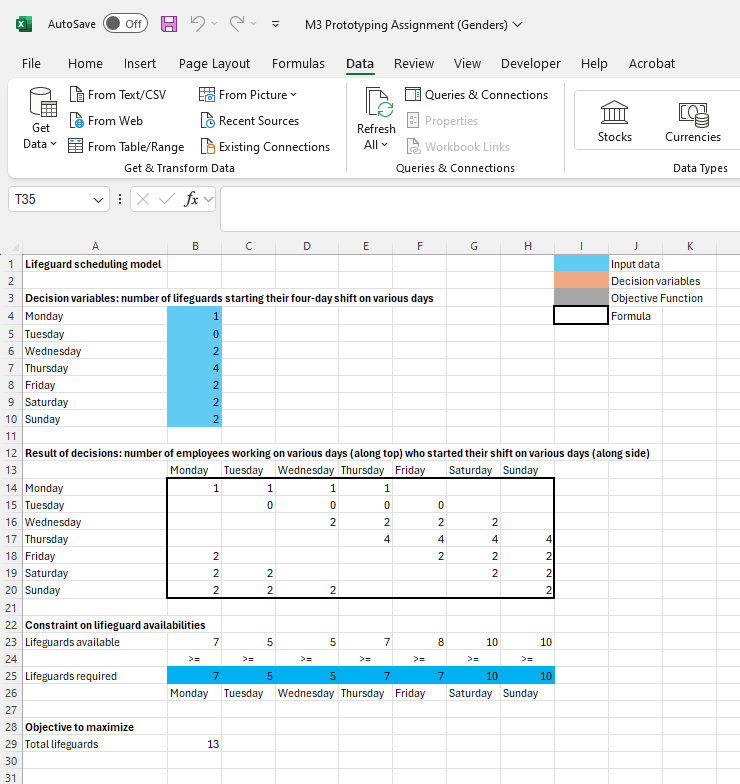

In [1]:
from IPython import display
display.Image("lifeguard_model.png")

From our Excel model, the following lifeguards scheduled per day is the optimal solution:\
Monday: 7 lifeguards\
Tuesday: 5 lifeguards\
Wednesday: 5 lifeguards\
Thursday: 7 lifeguards\
Friday: 8 lifeguards\
Saturday: 10 lifeguards\
Sunday: 10 lifeguards\
Total Lifeguards (employees): 13

## Screenshot of Excel Solver - Lifeguard Scheduling

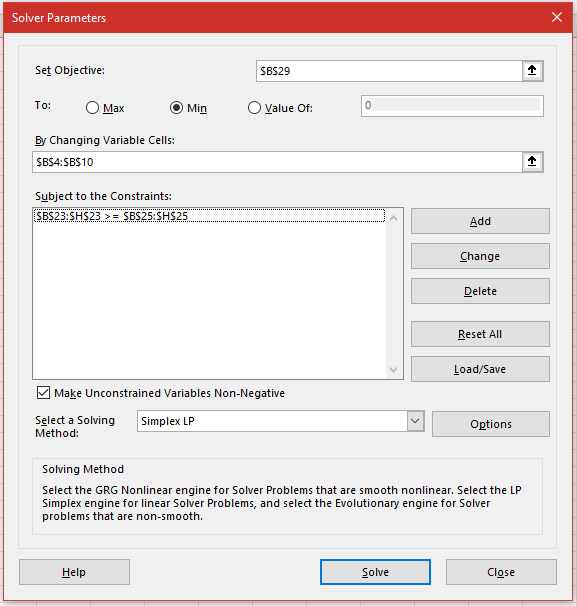

In [2]:
display.Image("lifeguard_solver.png")

## Python/Gurobi Model - Lifeguard Scheduling

In [3]:
from gurobipy import *
m = Model('lifeguard')
 
# Sets
## Sets of days
D = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
 
# Parameters
## Minimum number of employees required each day
r = [7,5,5,7,7,10,10]
## Workday adjacency matrix
A = [[1,0,0,0,1,1,1],\
    [1,1,0,0,0,1,1],\
    [1,1,1,0,0,0,1],\
    [1,1,1,1,0,0,0],\
    [0,1,1,1,1,0,0],\
    [0,0,1,1,1,1,0],\
    [0,0,0,1,1,1,1]]

# Decision Variables
## Number of employees, non-negativity included with lower-bound, using vtype to produce integer values in DVs
x = [m.addVar(name=D[j],lb=0) for j in range(len(D))]
m.update()
 
# Objective Function
## Minimize number of employees
m.setObjective(sum(x), GRB.MINIMIZE)
m.update()
 
# Constraints
## Number of employees constraint
m.addConstrs(quicksum(A[i][j]*x[j] for j in range(len(D))) >= r[i] for i in range(len(D)))
m.update()

# Solve and Print Solution
m.optimize()
print('\n\n')
for var in m.getVars():
    print('The company shoud schedule %s lifeguards on %s.' % (round(var.x,2),var.varName))
print('The total number of lifeguards is %s.' % round(m.objval,2))

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-03
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 5 5600X 6-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 7 rows, 7 columns and 28 nonzeros
Model fingerprint: 0xf0119958
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 1e+01]
Presolve time: 0.00s
Presolved: 7 rows, 7 columns, 28 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   5.100000e+01   0.000000e+00      0s
       6    1.3000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.300000000e+01



The company shoud schedule 1.0 lifeguards on Monday.
The company shou

In [4]:
###############################################################################################################################

## 2) Model Formulation - Multiperiod Planning

**Sets** \
$W$: set of weeks \{0=Week_0, 1=Week_1, ..., 6=Week_5\}\
$\hat{W}$: set of weeks including Week 0 \{0,1,2,3,4,5,6\}

**Parameters** \
$D$: vector of demands (105,170,230,180,150,250) \
$C$: per unit production costs (190,190,190,190,190,190) \
$V$: per unit overtime production costs (260,260,260,260,260,260) \
per unit holding costs = 10 dollars \
initial inventory = 0 \
production capacity = 160 \
overtime production capacity = 50 

**Decision Variables** \
$P$: vector amount of units to produce each week $W$ \
$T$: vector amount of units to overtime produce each week $W$ \
$I$: vector amount of inventory at the end of each week $\hat{W}$

**Objective Function and Constraints** \
The optimization model is formulated as 

\begin{equation*}
\begin{matrix}
\underset{P,T,I}{\min} & \underset{j \in W}{\sum} C_jP_j + V_jT_j + 10I_j  &\\
\textrm{s.t.} & I_{j-1}+P_j + T_j & = & D_j+I_j, & \forall j\in W\\ 
& I_0 & = & 0 &  \\
& P_j & \leq & 160,  & \forall j\in W \\
& T_j & \leq & 50, & \forall j\in W \\
& P_j & \geq & 0, & \forall j\in W \\
& T_j & \geq & 0, & \forall j\in W \\
& I_j & \geq & 0, & \forall j\in \hat{W} \\
\end{matrix}
\end{equation*}

## Screenshot of Excel Model - Multiperiod Planning

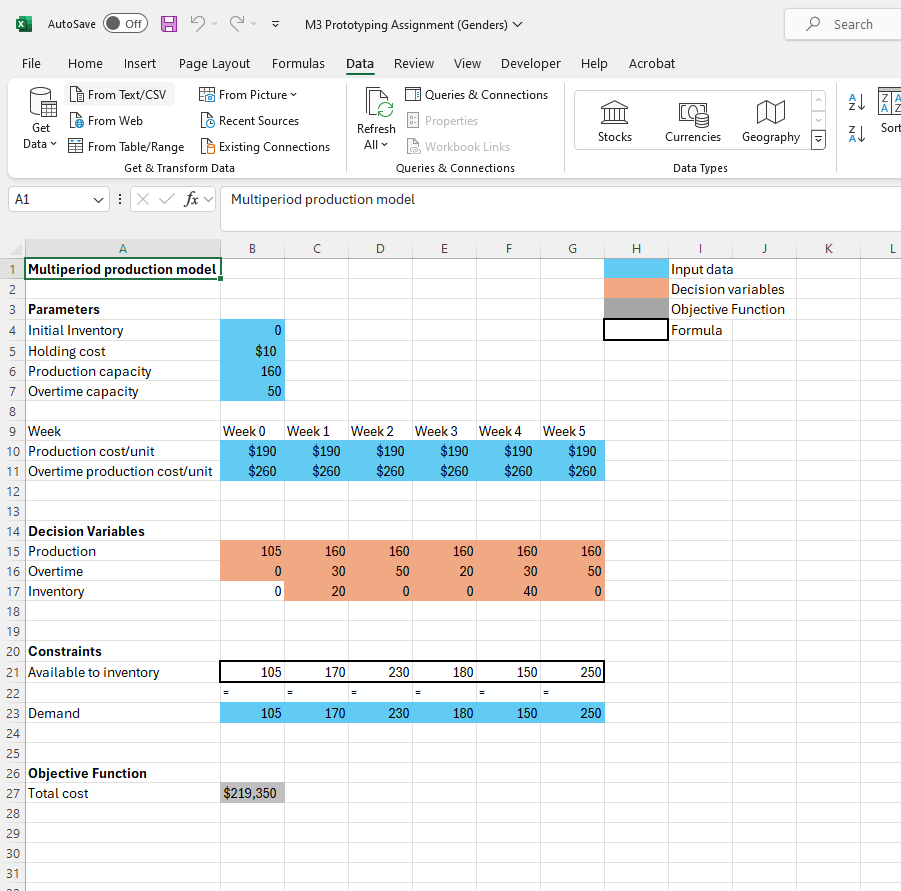

In [5]:
display.Image("multiperiod_model.png")

The factory should produce **105.0** snowboards, overtime produce **0.0** snowboards, and hold **0.0** in inventory in **Week 0**. \
The factory should produce **160.0** snowboards, overtime produce **30.0** snowboards, and hold **20.0** in inventory in **Week 1**. \
The factory should produce **160.0** snowboards, overtime produce **50.0** snowboards, and hold **0.0** in inventory in **Week 2**. \
The factory should produce **160.0** snowboards, overtime produce **20.0** snowboards, and hold **0.0** in inventory in **Week 3**. \
The factory should produce **160.0** snowboards, overtime produce **30.0** snowboards, and hold **40.0** in inventory in **Week 4**. \
The factory should produce **160.0** snowboards, overtime produce **50.0** snowboards, and hold **0.0** in inventory in **Week 5**. \

The total cost is **$219,350**.

## Screenshot of Excel Solver - Multiperiod Planning

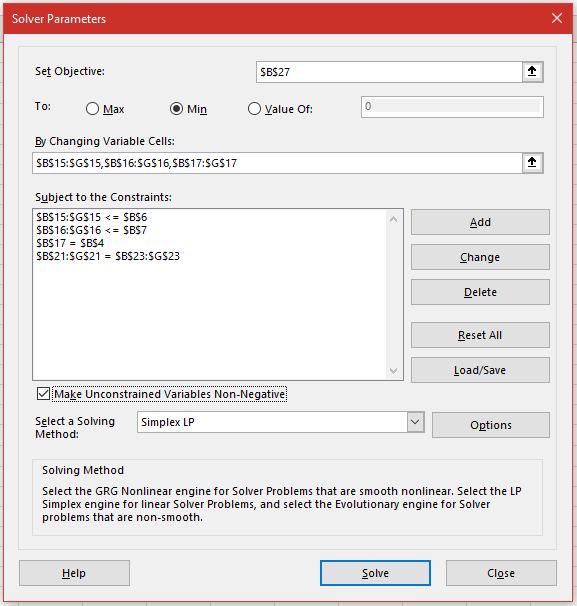

In [6]:
display.Image("multiperiod_solver.png")

## Python/Gurobi Model - Multiperiod Planning

In [7]:
from gurobipy import *
import numpy as np
m = Model('multiperiod')

# Sets
## Set of weeks
W = ['Week 0', 'Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5']
Wh = ['Week 0', 'Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5']

# Parameters
## Demands
D = [105,170,230,180,150,250]
## Unit costs
C = [190,190,190,190,190,190]
V = [260,260,260,260,260,260]

# Decision Variables
## Number to produce each week
P = [m.addVar(name=W[j], lb=0, ub = 160) for j in range(len(W))]
## Number to overtime produce each week 
T = [m.addVar(name=W[j], lb=0, ub = 50) for j in range(len(W))]
## Inventory at the end of each week
I = [m.addVar(name=Wh[j], lb=0) for j in range(len(Wh))]
m.update()

# Objective Function
## Minimize total cost
m.setObjective(quicksum(C[j]*P[j] + V[j]*T[j]  + 10*I[j] for j in range(len(W))), GRB.MINIMIZE)
m.update()

# Constraints
## Demand and inventory balance constraints
m.addConstrs(I[j-1] + P[j] + T[j] == D[j] + I[j] for j in range(len(W)))
## Initial inventory
m.addConstr(I[0] == 0)
m.update()

# Solve and Print Solution
m.optimize()
print("\n\n")
for j in range(len(W)):
    print("The factory should produce %s snowboards, overtime produce %s snowboards, and hold %s in inventory in %s." % ( P[j].x, T[j].x, I[j].x, W[j] ))
print("\nThe total cost is %s." % "${:,.0f}".format(m.objval))

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 5 5600X 6-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 7 rows, 18 columns and 25 nonzeros
Model fingerprint: 0xe73abedc
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 3e+02]
  Bounds range     [5e+01, 2e+02]
  RHS range        [1e+02, 3e+02]
Presolve removed 5 rows and 10 columns
Presolve time: 0.00s
Presolved: 2 rows, 8 columns, 9 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5310173e+05   3.878163e+01   0.000000e+00      0s
       3    2.1935000e+05   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.193500000e+05



The factory should produce 105.0 snowboards, overtime produce 0.0 snowboards, and hold 0.0 in inventory in Week 0.
The fa

In [8]:
###############################################################################################################################

## 3) Model Formulation - Security Financial Planning

**Set** \
$I$: set of investments \{0=Savings Account, 1=Cert. of Deposit, 2=Atlantic Lighting, 3=Arkansas REIT, 4=Bedrock Insurance,\
                         5=Nocal Mining Bond, 6=Minicomp Systems, 7=Anthony Hotels}

**Parameters** \
$E$: vector of expected returns (.04, .052, .071, .10, .082, .065, .20, .125) \
$R$: vector of investment ratings (A, A, B+, B, A, B+, A, C) \
$L$: vector of liquidities (immediate, 5-year, immediate, immediate, 1-year, 1-year, immediate, immediate) \
$F$: vector of risk factors (0, 0, 25, 30, 20, 15, 65, 40)\
Amount to invest: 100,000 dollars


**Decision Variables** \
$x_I$: amount to invest in each investment $I$ 


**Objective Function and Constraints** \
The optimization model is formulated as 

\begin{equation*}
\begin{matrix}
\underset{x}{\min} & \underset{j \in I}{\sum} x_jF_j  &\\
\textrm{s.t.} & \underset{j \in I}{\sum} E_jx_j & \geq & .075 * 100000 & \forall j\in I\\
& x_0 + x_1 + x_4 + x_6 & \geq & .50 * 100000 & \\
& x_0 + x_2 + x_3 + x_6 + x_7 & \geq & .40 * 100000 \\
& x_0 + x_1 & \leq & .30 * 100000 \\
& \underset{j \in I}{\sum} x_j & = & 100000 & \forall j\in I\\
& x & \geq & 0
\end{matrix}
\end{equation*}

## Screenshot of Excel Model - Security Financial Planning

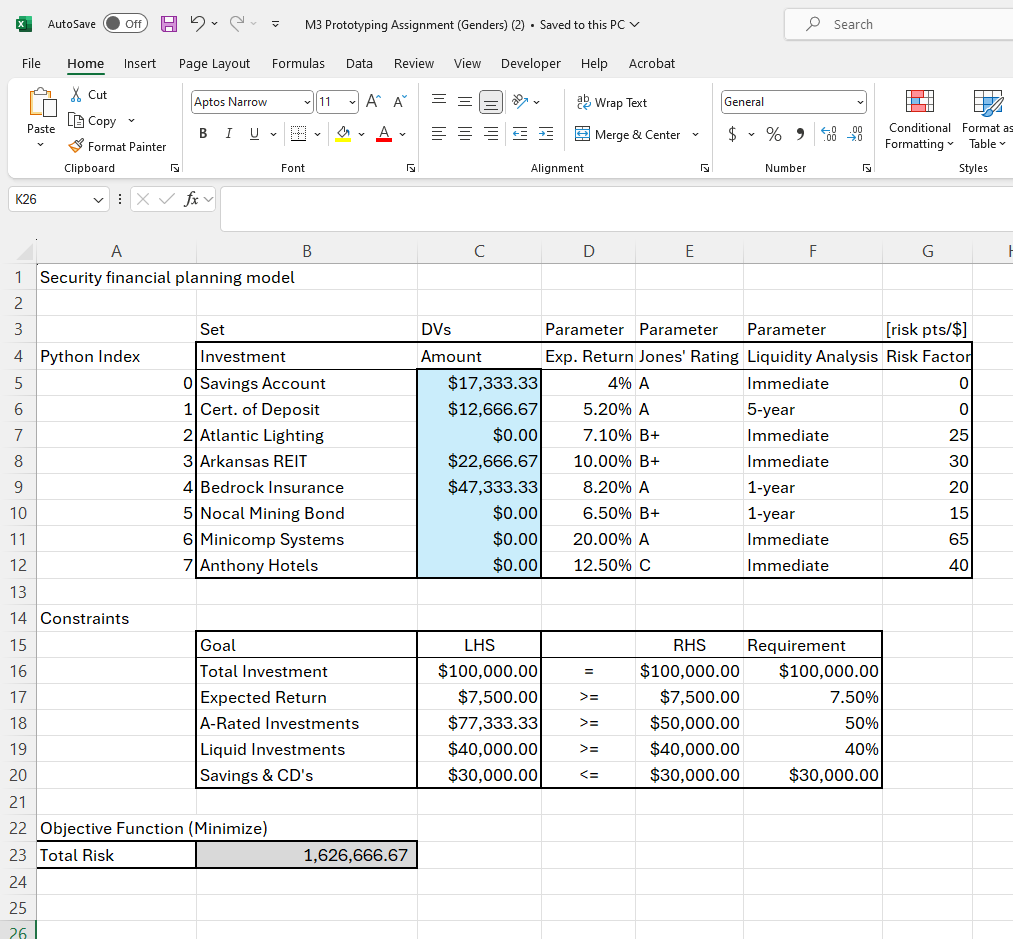

In [9]:
display.Image("security_model.png")

The following investments should be made to meet Nolan's portfolio goals: \
Savings Account: 17,333.33 dollars \
Cert. of Deposit: 12,666.67 dollars \
Atlantic Lighting: 0.00 dollars \
Arkansas REIT: 22,66.67 dollars \
Bedrock Insurance: 47,333.33 dollars \
Nocal Mining Bond: 0.00 dollars \
Minicomp Systems: 0.00 dollars \
Antony Hotels: 0.00 dollars \ 

Total Risk is 1,626,666.67 points

## Screenshot of Excel Solver - Security Financial Planning

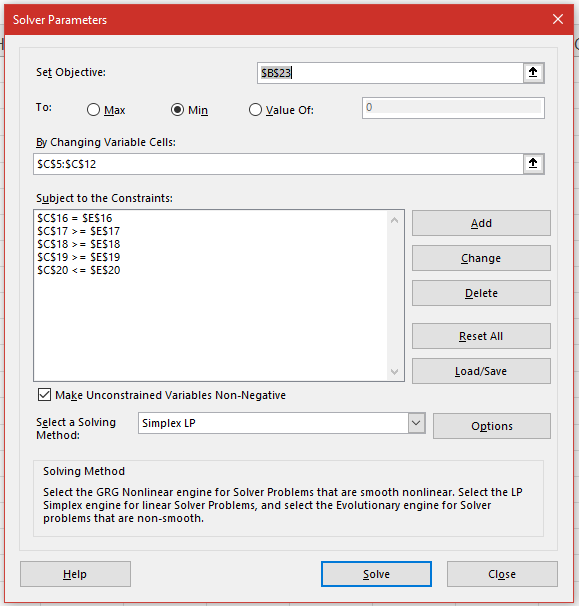

In [10]:
display.Image("security_solver.png")

## Python/Gurobi Model - Security Financial Planning

In [11]:
from gurobipy import *
m = Model('security financial planning')

# Sets
## Set of investments
I = ['Savings Account', 'Cert. of Deposit', 'Atlantic Lighting', 'Arkansas REIT', 'Bedrock Insurance',\
     'Nocal Mining Bond', 'Minicomp Systems', 'Anthony Hotels']

# Set Lengths
## Create ranges to simplify code
rI = range(len(I))

# Parameters
## Expected retuns
E = [.04,.052,.071,.10,.082,.065,.20,.125]
## Ratings
R = ['A', 'A', 'B+', 'B', 'A', 'B+', 'A', 'C']
## Liquidities
L = ['Immediate', '5-year', 'Immediate', 'Immediate', '1-year', '1-year', 'immediate', 'immediate']
## Risk Factors
F = [0,0,25,30,20,15,65,40]

# Decision Variables
x = [m.addVar(name=str(I[j]), lb=0) for j in  rI]
m.update()

# Objective Function
## Minimize risk
m.setObjective(quicksum(F[j]*x[j] for j in range(len(I))), GRB.MINIMIZE)

# Constraints
## Total Investment
m.addConstr(quicksum(x[j] for j in rI) == 100000)
## Expected Return
m.addConstr(quicksum(E[j]*x[j] for j in rI) >= 7500)
## A-Rated Investments
m.addConstr(x[0] + x[1] + x[4] + x[6] >= 50000)
## Liquidity 
m.addConstr(x[0] + x[2] + x[3] + x[6] + x[7] >= 40000)
## Savings and CDs
m.addConstr(x[0] + x[1] <= 30000)
m.update()

# Solve and Print Solution
m.optimize()
print('\n\n')
print("The optimal security financial investment plan is:")
for var in m.getVars():
    print("%s = $%s" % (var.varName,round(var.x,3)))
print("\nThe total risk is %s points." % "{:,.0f}".format(m.objval))

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 5 5600X 6-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 5 rows, 8 columns and 27 nonzeros
Model fingerprint: 0xf17ddf98
Coefficient statistics:
  Matrix range     [4e-02, 1e+00]
  Objective range  [2e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+03, 1e+05]
Presolve time: 0.00s
Presolved: 5 rows, 8 columns, 27 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.192000e+05   0.000000e+00      0s
       7    1.6266667e+06   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.626666667e+06



The optimal security financial investment plan is:
Savings Account = $17333.333
Cert. of Deposit = $12666.667
Atlantic Lighting = $0.0
Arkansas REIT = $22666.66